# D.2. Demo of Mean-Variance Expansion

## FINM 25000

### UChicago Financial Mathematics

#### Summer 2025

* Mark Hendricks
* hendricks@uchicago.edu

***

In [16]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [17]:
filepath_data = '../data/spx_returns_weekly.xlsx'

In [18]:
SHEET = 's&p500 rets'
rets_raw = pd.read_excel(filepath_data,sheet_name=SHEET).set_index('date')

# Demo

In [19]:
N = 10

np.random.seed(99)
idx = np.random.choice(rets_raw.columns,size=N,replace=False)

rets = rets_raw[idx]

In [20]:
display(list(rets.columns))

['BAX', 'CRL', 'LKQ', 'NDSN', 'BLDR', 'T', 'AZO', 'ULTA', 'TDY', 'UHS']

In [21]:
FREQ = 52

mu = rets.mean() * FREQ
covmat = rets.cov() * FREQ
vec_ones = np.ones(mu.shape)

mets = pd.DataFrame(index=rets.columns,columns=['mean','vol'],dtype=float)
mets['mean'] = mu
mets['vol'] = rets.std()*np.sqrt(FREQ)

In [22]:
w_gmv = np.linalg.solve(covmat,vec_ones)
w_tan = np.linalg.solve(covmat,mu)

w_gmv /= w_gmv.sum()
w_tan /= w_tan.sum()

In [23]:
def delta_parameter(target_mean):
    delta = (target_mean - mu.T@w_gmv)/(mu.T@w_tan - mu.T@w_gmv)
    return delta

In [24]:
MAX = (N+5) * .0005 * FREQ
MIN = - MAX/1.6

grid = np.linspace(MIN,MAX,250)
df = pd.DataFrame(index=grid,columns=['delta','mu','vol'],dtype=float)
df.index.name = 'mean'

for mu_target in grid:
    delta = delta_parameter(mu_target)
    w = delta * w_tan + (1-delta) * w_gmv
    df.loc[mu_target,'delta'] = delta
    df.loc[mu_target,'mu'] = w.T @ mu
    df.loc[mu_target,'vol'] = np.sqrt(w.T @ covmat @ w)

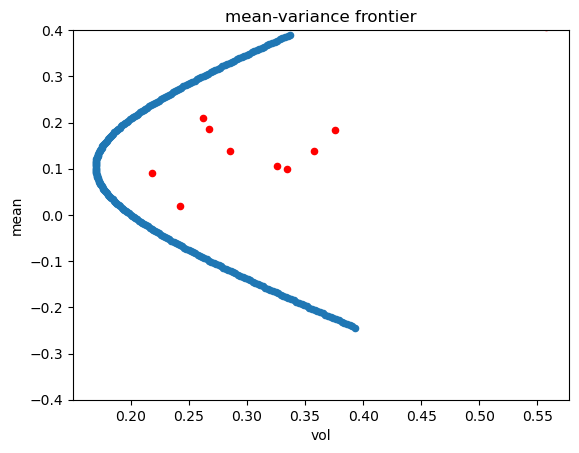

In [25]:
ax = df.reset_index().plot.scatter(x='vol',y='mu')
mets.plot.scatter(ax=ax, x='vol', y='mean',color='r')
plt.ylim(-(N+10)/50,(N+10)/50)
plt.title('mean-variance frontier')
plt.show()

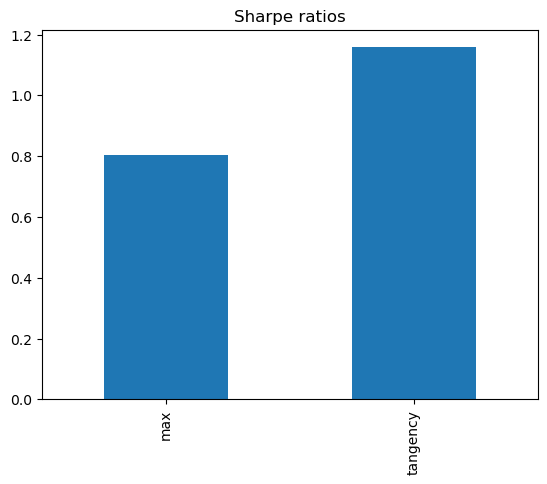

In [26]:
sr = (mets['mean'] / mets['vol'])
sr.loc['max'] = sr.max()
sr.loc['tangency'] = (mu.T @ w_tan)/np.sqrt(w_tan.T @ covmat @ w_tan)
ax = sr.loc[['max','tangency']].plot.bar()
plt.title('Sharpe ratios')
plt.show()

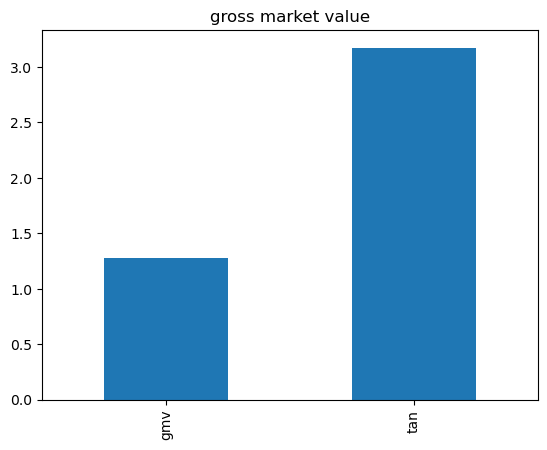

In [27]:
wts = pd.DataFrame({'gmv':w_gmv, 'tan':w_tan})
wts.abs().sum().plot.bar()
plt.title('gross market value')
plt.show()